# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [56]:
print("Воспроизводимость результатов: каждый ран у нас будут одинаковые результаты .")
print(
    "Сравнение результатов: если хотим сравнить результаты , то без фиксации могут быть шумы."
)
print(
    "Ошибки тестирования результата: Может возникнуть ситуация когда мы не будем знать влияние наших изменений при обучении модели на результат."
)
print("Проверяющим будет более понятен результат.")

Воспроизводимость результатов: каждый ран у нас будут одинаковые результаты .
Сравнение результатов: если хотим сравнить результаты , то без фиксации могут быть шумы.
Ошибки тестирования результата: Может возникнуть ситуация когда мы не будем знать влияние наших изменений при обучении модели на результат.
Проверяющим будет более понятен результат.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [57]:
df_train = pd.read_csv(
    "https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv"
)
df_test = pd.read_csv(
    "https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv"
)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [58]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [59]:
display(df_test)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [60]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [61]:
train_describe_categorical = df_train.describe(include="object")
test_describe_categorical = df_test.describe(include="object")

In [62]:
print("Train stats obj : ")
display(train_describe_categorical)

Train stats obj : 


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [63]:
print("Test stats obj : ")
display(test_describe_categorical)

Test stats obj : 


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [64]:
train_describe_numeric = df_train.describe()
test_describe_numeric = df_test.describe()

In [65]:
print("Train stats numeric : ")
display(train_describe_numeric)

Train stats numeric : 


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [66]:
print("Test stats numeric : ")
display(test_describe_numeric)

Test stats numeric : 


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [67]:
missing_train = df_train.isnull().sum()

missing_test = df_test.isnull().sum()

missing_columns_train = df_train.columns[df_train.isnull().any()]

print("Missed in train:")
print(missing_train[missing_train > 0])

print("\nMissed  in test:")
print(missing_test[missing_test > 0])

print("Missed in  columns :")
print(missing_columns_train)

Missed in train:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

Missed  in test:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64
Missed in  columns :
Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [68]:
train_no_target = df_train.drop(columns=["selling_price"], axis=1)
duplicates_train = train_no_target[df_train.duplicated()]
if not duplicates_train.empty:
    print("Number of duplicates in train:")
    print(train_no_target.duplicated().sum())

Number of duplicates in train:
1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [69]:
print("Train duplicates:")
duplicates_train.sample(n=10)

Train duplicates:


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
939,BMW X4 M Sport X xDrive20d,2019,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
4837,Ford Fiesta Classic 1.4 Duratorq CLXI,2012,64000,Diesel,Individual,Manual,Second Owner,17.8 kmpl,1399 CC,67 bhp,160Nm@ 2000rpm,5.0
4816,BMW X4 M Sport X xDrive20d,2019,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
6024,Fiat Grande Punto 1.4 Emotion,2009,55000,Petrol,Individual,Manual,First Owner,14.6 kmpl,1368 CC,88.7 bhp,115Nm@ 4500rpm,5.0
1466,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
1785,Maruti Celerio VXI,2016,60000,Petrol,Individual,Manual,First Owner,23.1 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
3703,Honda Jazz VX,2016,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.2 kmpl,1199 CC,88.7 bhp,110Nm@ 4800rpm,5.0
4383,BMW X1 sDrive20i xLine,2016,30000,Petrol,Individual,Automatic,Second Owner,15.71 kmpl,1998 CC,189 bhp,280Nm@ 1350-4600rpm,5.0
5406,Hyundai Creta 1.4 CRDi S,2018,70000,Diesel,Individual,Manual,First Owner,21.38 kmpl,1396 CC,88.7 bhp,219.7Nm@ 1500-2750rpm,5.0
2944,Maruti Baleno Alpha 1.3,2018,38817,Diesel,Dealer,Manual,First Owner,27.39 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [70]:
df_train.drop_duplicates(
    subset=df_train.columns.difference(["selling_price"]), keep="first", inplace=True
)
print(df_train.shape)

(5840, 13)


In [71]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [72]:
df_train.reset_index(drop=True, inplace=True)
assert df_train.shape == (5840, 13)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [73]:
df_train["mileage"] = pd.to_numeric(
    df_train["mileage"]
    .str.replace(" km/kg", "")
    .str.replace(" kmpl", "")
    .str.replace(",", ""),
    errors="coerce",
)

df_train["engine"] = pd.to_numeric(
    df_train["engine"].str.replace(" CC", ""), errors="coerce"
)

df_train["max_power"] = pd.to_numeric(
    df_train["max_power"].str.replace(" bhp", ""), errors="coerce"
)

In [74]:
df_test["mileage"] = pd.to_numeric(
    df_test["mileage"]
    .str.replace(" km/kg", "")
    .str.replace(" kmpl", "")
    .str.replace(",", ""),
    errors="coerce",
)

df_test["engine"] = pd.to_numeric(
    df_test["engine"].str.replace(" CC", ""), errors="coerce"
)

df_test["max_power"] = pd.to_numeric(
    df_test["max_power"].str.replace(" bhp", ""), errors="coerce"
)

In [75]:
def process_torque(row):
    """Multiply kg-m by 10 instead of real conversion"""
    if pd.notna(row[0]):
        return pd.to_numeric(row[0])
    elif pd.notna(row[1]):
        return pd.to_numeric(row[1]) * 10
    else:
        return None

In [76]:
"""I am using re to extract needed values ."""
torque_info = df_train["torque"].str.extract(r"(\d+\.?\d*)\s?Nm|(\d+\.?\d*)\s?@")
rpm_info = df_train["torque"].str.extract(r"(\d+\.?\d*)\s?rpm")

torque_info["torque_Nm"] = torque_info.apply(process_torque, axis=1)
df_train["torque_Nm"] = torque_info["torque_Nm"]
df_train["max_torque_rpm"] = pd.to_numeric(rpm_info[0], errors="coerce")

df_train.drop(["torque"], axis=1, inplace=True)

df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_Nm,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,NaN,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,115.0,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,NaN,4000.0


In [77]:
"""Do same but for test data """
torque_info = df_test["torque"].str.extract(r"(\d+\.?\d*)\s?Nm|(\d+\.?\d*)\s?@")
rpm_info = df_test["torque"].str.extract(r"(\d+\.?\d*)\s?rpm")

torque_info["torque_Nm"] = torque_info.apply(process_torque, axis=1)

df_test["torque_Nm"] = torque_info["torque_Nm"]
df_test["max_torque_rpm"] = pd.to_numeric(rpm_info[0], errors="coerce")

df_test.drop(["torque"], axis=1, inplace=True)

df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_Nm,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0,260.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0,260.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0,172.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0,200.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0,NaN,NaN


In [78]:
print("Мнение : кажется torque дублирует по смыслу max_power ")
correlation_matrix = df_train[["max_power", "torque_Nm", "selling_price"]].corr()
print(correlation_matrix)

Мнение : кажется torque дублирует по смыслу max_power 
               max_power  torque_Nm  selling_price
max_power       1.000000   0.567583       0.695593
torque_Nm       0.567583   1.000000       0.405582
selling_price   0.695593   0.405582       1.000000


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [79]:
numeric_columns = df_train.select_dtypes(include=["number"]).columns

median_values = df_train[numeric_columns].median()

df_train[numeric_columns] = df_train[numeric_columns].fillna(median_values)

print("Missing values before filling in the training set:")
print(df_train.isnull().sum())

Missing values before filling in the training set:
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_Nm         0
max_torque_rpm    0
dtype: int64


In [80]:
df_test[numeric_columns] = df_test[numeric_columns].fillna(median_values)

print("Missing values before filling in the test set:")
df_test.isnull().sum()

Missing values before filling in the test set:


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_Nm         0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [81]:
print(
    "1.Ограничены возможные значения . Если это касается мест то это ограниченное значение  (2,4,6). "
)
print(
    "2.Количество сидений представляет собой категорию (класс)  автомобиля , например 2 сидения (купе/кабриолет), 6-7"
    "(внедорожник/миннивен) Кол-во сидений представляет собой скорее категориальные значения."
)
print(
    "3.Количество сидений не имеет четкого порядка 4 сиденья не больше и не меньше чем 6 в смысле влияния на целевую переменную . 4 и 6 сидений просто разные категории автомобилей "
)

1.Ограничены возможные значения . Если это касается мест то это ограниченное значение  (2,4,6). 
2.Количество сидений представляет собой категорию (класс)  автомобиля , например 2 сидения (купе/кабриолет), 6-7(внедорожник/миннивен) Кол-во сидений представляет собой скорее категориальные значения.
3.Количество сидений не имеет четкого порядка 4 сиденья не больше и не меньше чем 6 в смысле влияния на целевую переменную . 4 и 6 сидений просто разные категории автомобилей 


In [82]:
df_train["engine"] = pd.to_numeric(df_train["engine"], errors="coerce").astype("Int64")
df_train["seats"] = pd.to_numeric(df_train["seats"], errors="coerce").astype("Int64")

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

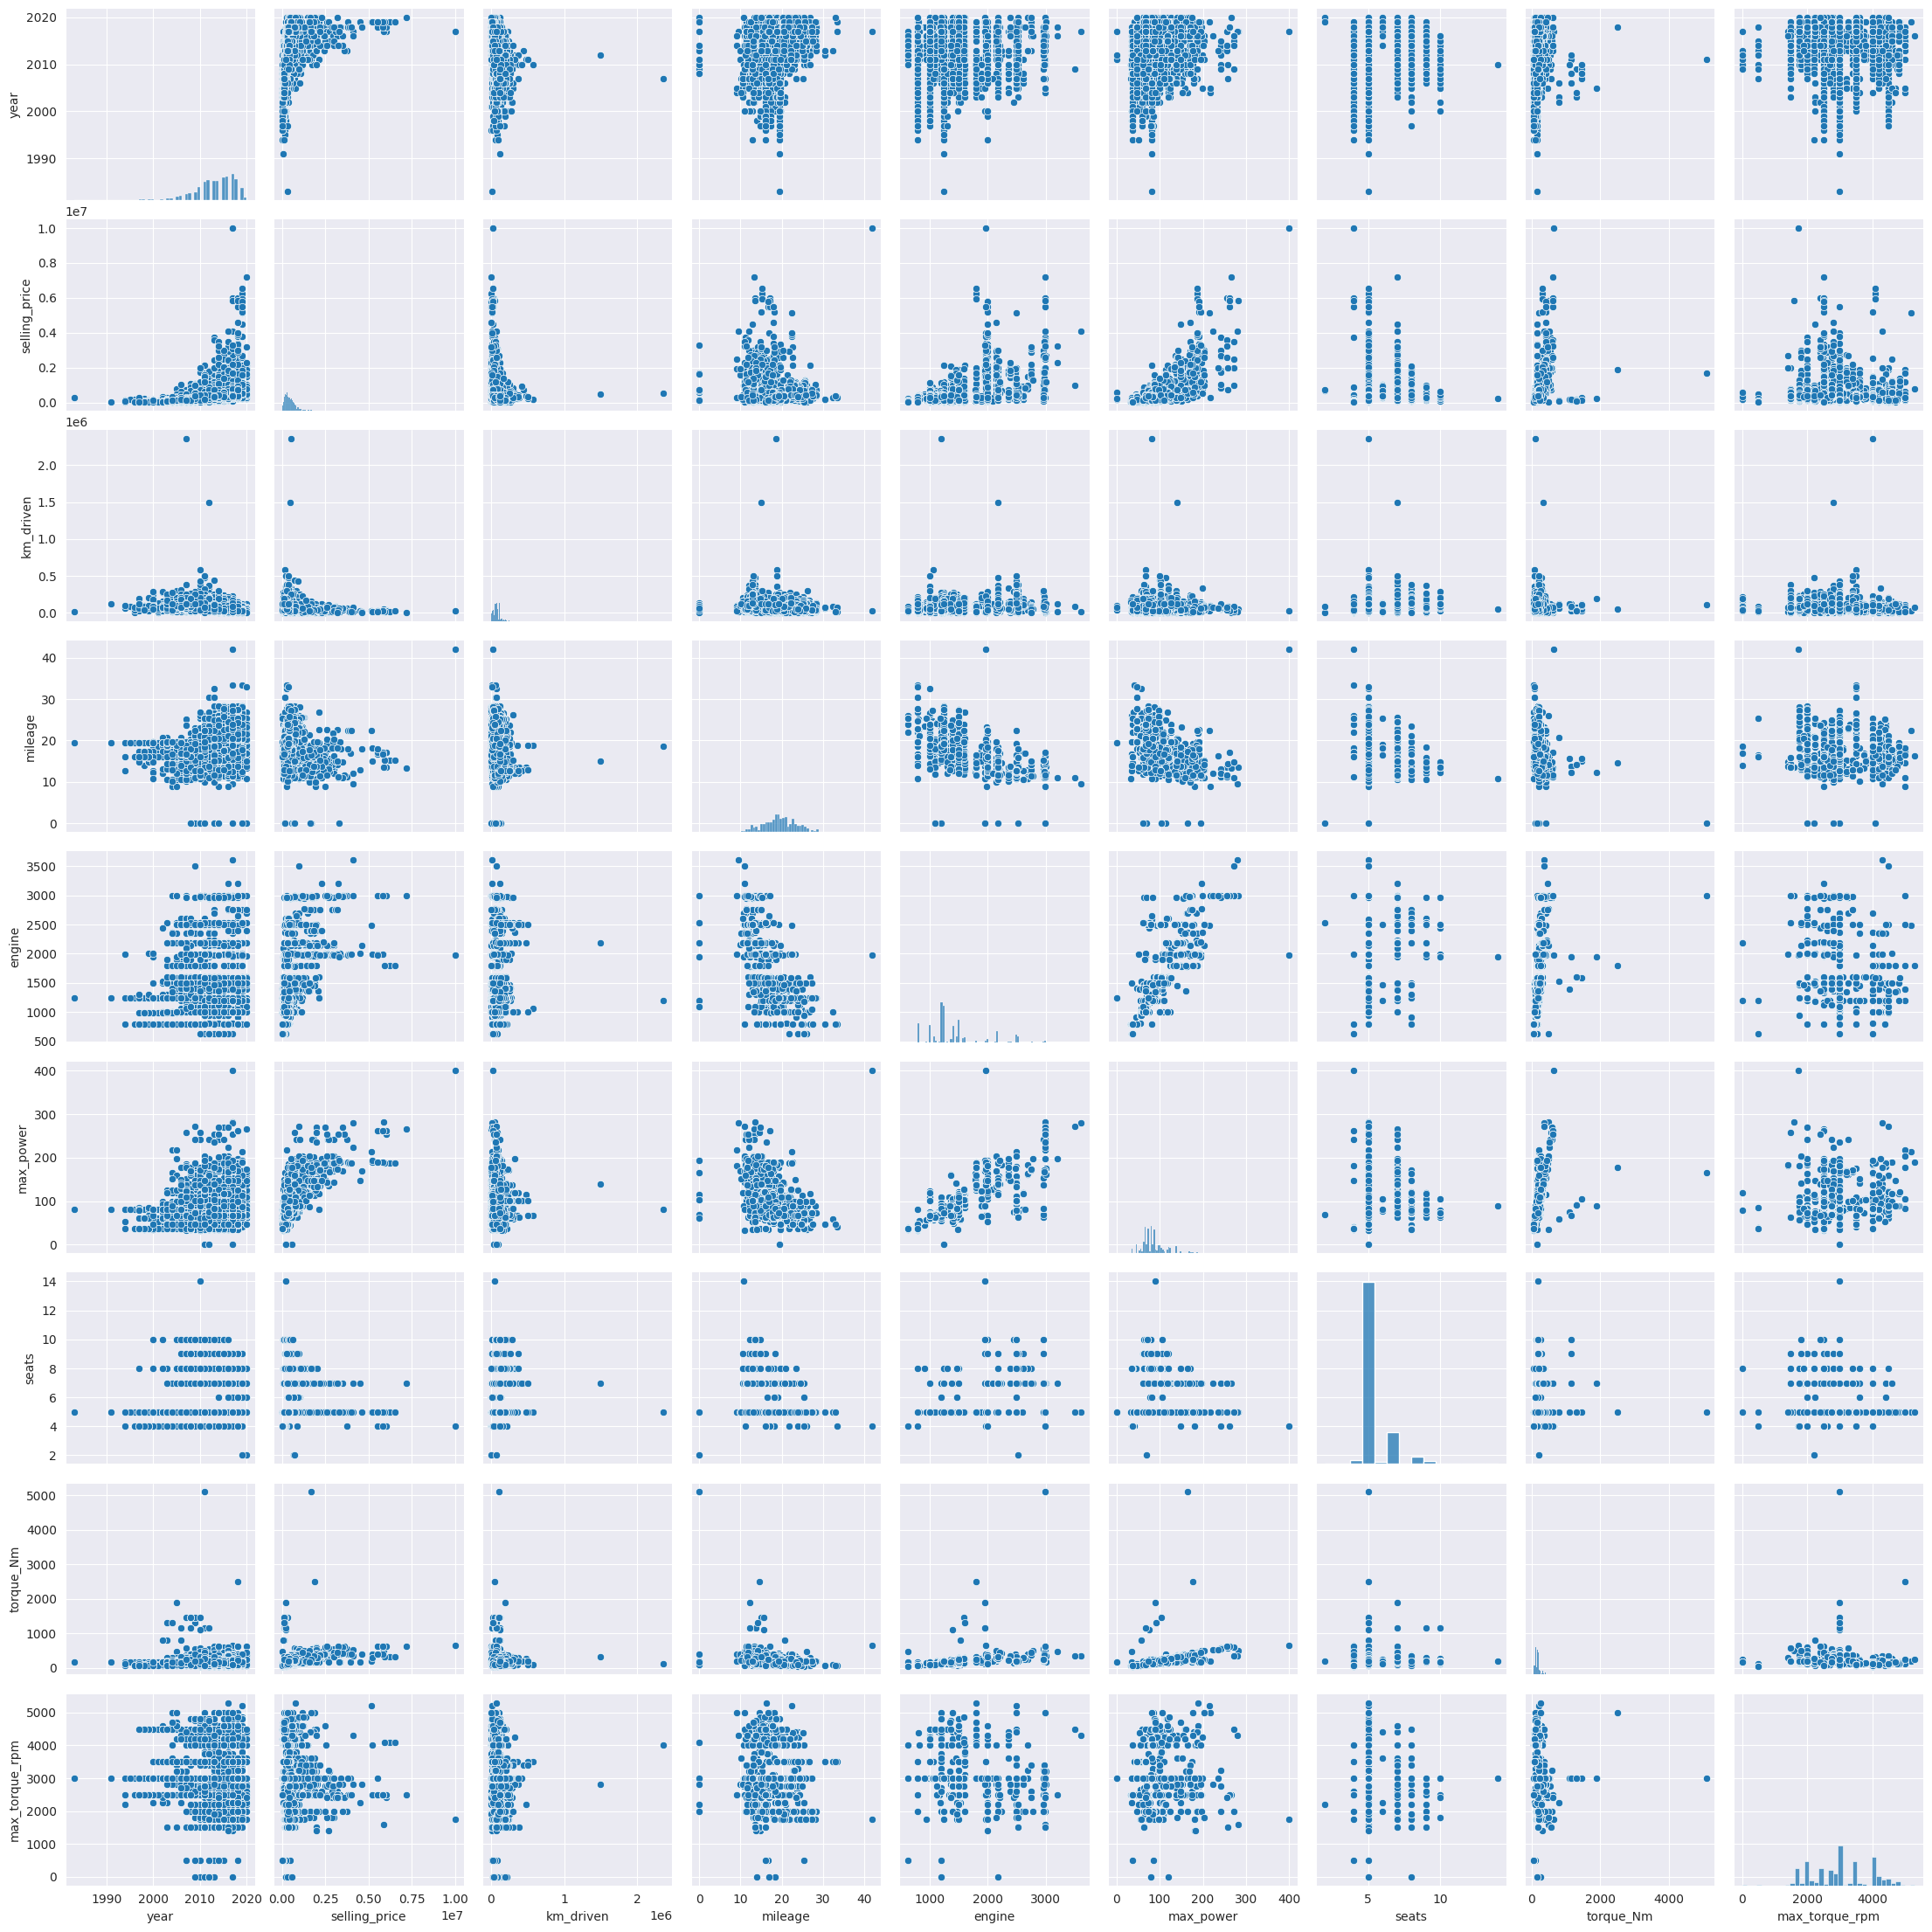

In [83]:
sns.pairplot(df_train.select_dtypes(include=["float64", "int64"]))
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [84]:
"Линейная зависимость(скорее квадратичная) между годом продажи и ценой на авто(новые авто зачастую дороже)"
"Линейная зависимость мощности и цены на авто(чем мощнее тем дороже) ,  "
"У всех автомобилей нет прямой  зависимости между mileage и целевой переменной , возмодна обратная зависимость "
"есть выбросы мощных авто которые стоят дорого . "

'есть выбросы мощных авто которые стоят дорого . '

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

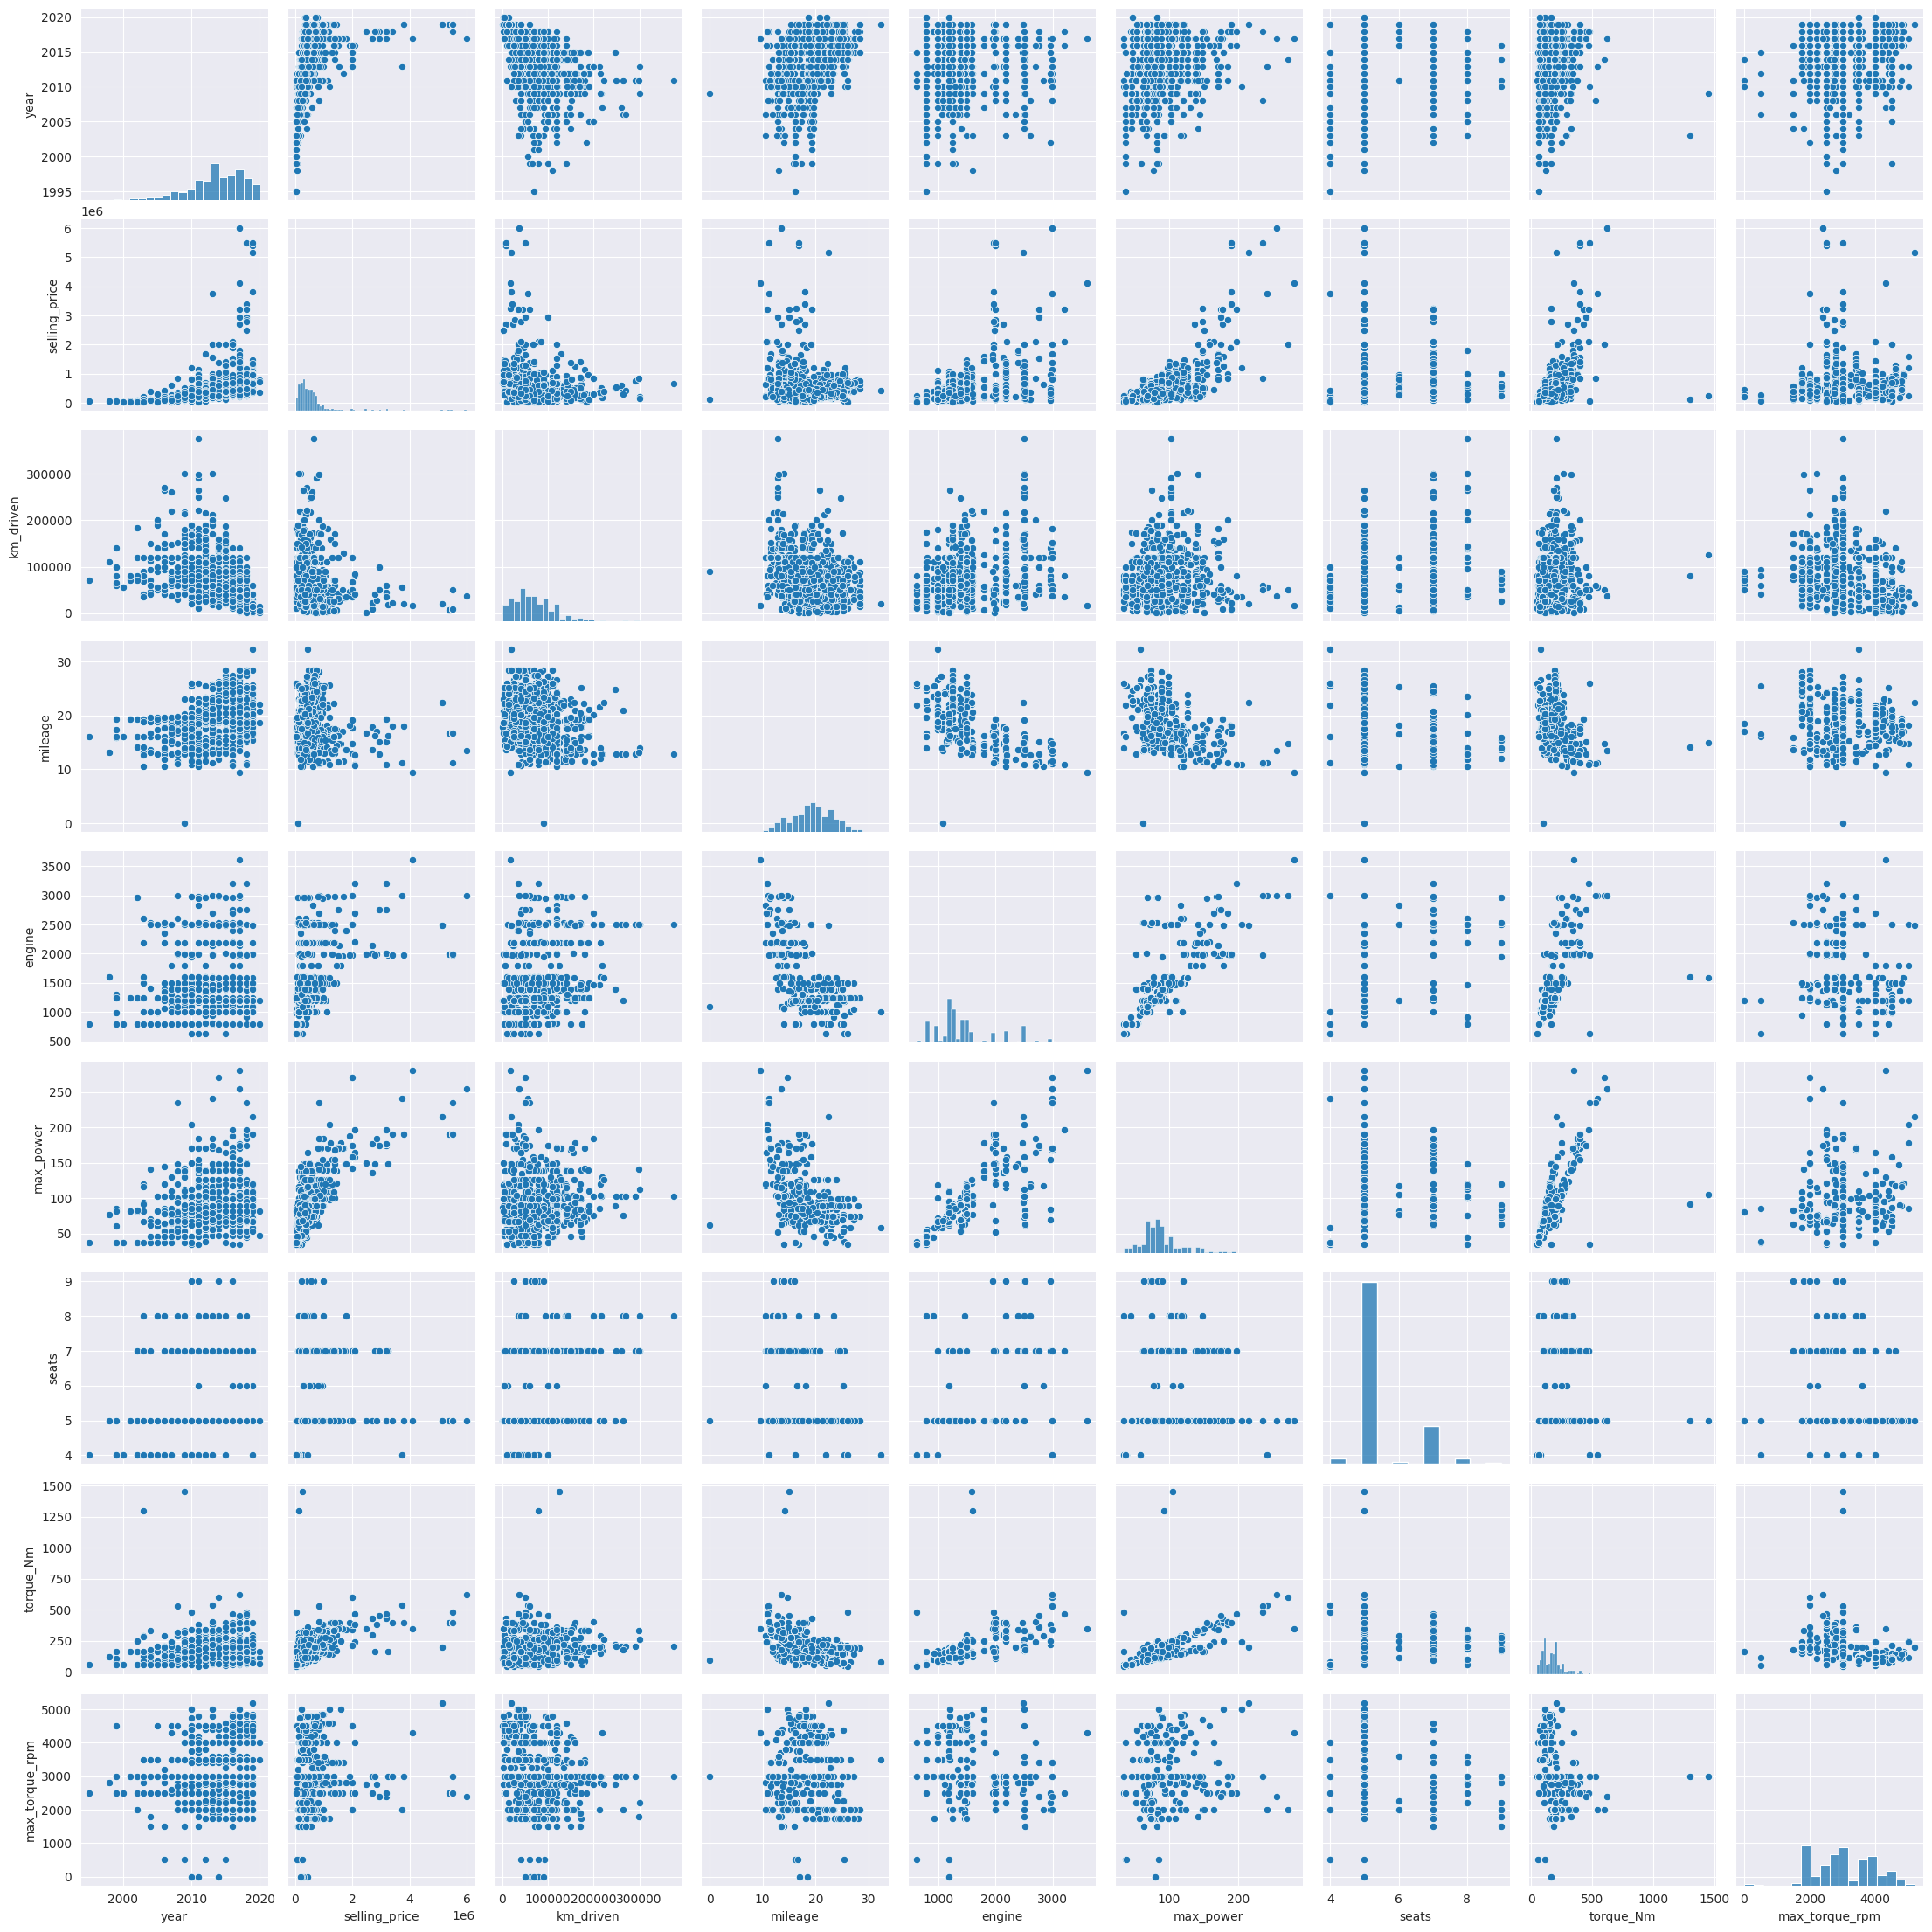

In [85]:
sns.pairplot(df_test.select_dtypes(include=["float64", "int64"]))
plt.show()

In [86]:
print(
    "Train и Test похожи , но кажется что в интересующих нас фичах таких как max_power больше выбросов   "
)

Train и Test похожи , но кажется что в интересующих нас фичах таких как max_power больше выбросов   


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

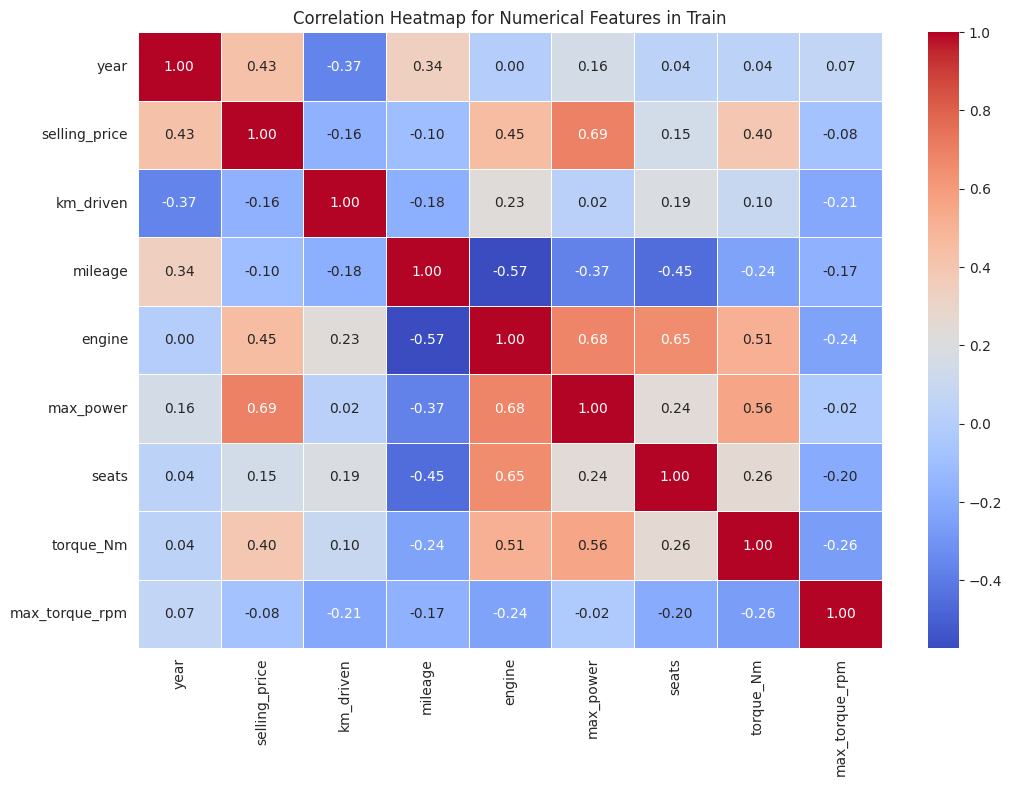

In [87]:
numerical_features = df_train.select_dtypes(include=["float64", "int64"])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features in Train")
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [34]:
min_corr = correlation_matrix.unstack().sort_values(ascending=True).head(2)
least_correlated_features = min_corr.index

print(
    "Признаки с самым большим отрицательным значением корреляции(т.е имеющие обратную зависимость) "
)
print(least_correlated_features)

Признаки с самым большим отрицательным значением корреляции(т.е имеющие обратную зависимость) 
MultiIndex([( 'engine', 'mileage'),
            ('mileage',  'engine')],
           )


In [35]:
max_corr = (
    correlation_matrix.unstack()
    .sort_values(ascending=False)
    .loc[correlation_matrix.unstack() < 1]
    .drop_duplicates()
    .head(2)
)
most_correlated_features = max_corr.index

print("Признаки с наибольшей положительной зависимостью :")
print(most_correlated_features)
print(f"Для нас важна линейная зависимость {most_correlated_features[0]} ")

Признаки с наибольшей положительной зависимостью :
MultiIndex([('selling_price', 'max_power'),
            (    'max_power',    'engine')],
           )
Для нас важна линейная зависимость ('selling_price', 'max_power') 


In [36]:
correlation_year_km = correlation_matrix.loc["year", "km_driven"]

print(f"Корреляция между годом и пробегом: {correlation_year_km}")
print(
    "Как мы видим корреляция отрицательна ,и есть обратная зависимость между годом и тем сколько километров проехала машина. "
)
print(
    "Да действительно можно утверждать (но не абсолютно ) что чем старее машина тем больше она проехала. Возможно на трейне это менее заметно чем на тесте . И там и там есть выбросы "
)

Корреляция между годом и пробегом: -0.36896578600117047
Как мы видим корреляция отрицательна ,и есть обратная зависимость между годом и тем сколько километров проехала машина. 
Да действительно можно утверждать (но не абсолютно ) что чем старее машина тем больше она проехала. Возможно на трейне это менее заметно чем на тесте . И там и там есть выбросы 


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

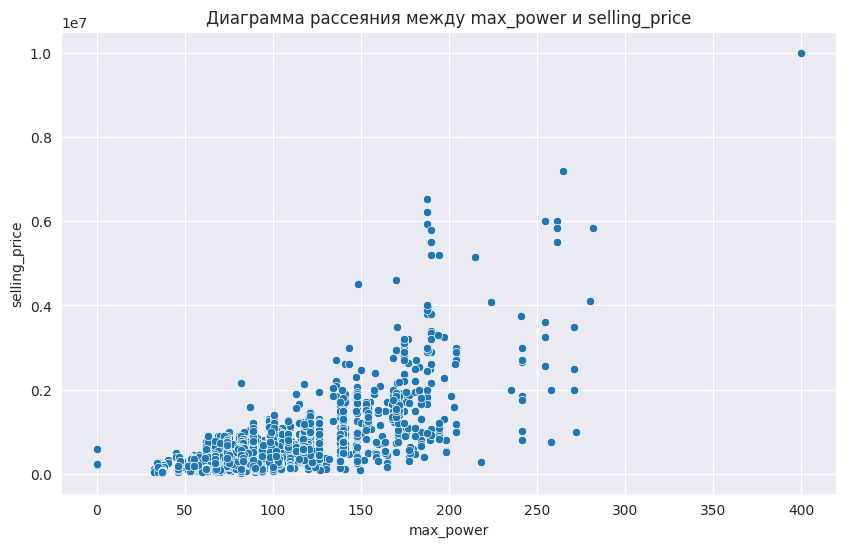

In [88]:
selling_price, max_power = most_correlated_features[0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=max_power, y=selling_price, data=df_train)
plt.title(f"Диаграмма рассеяния между {max_power} и {selling_price}")
plt.xlabel(max_power)
plt.ylabel(selling_price)
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

построим зависимость целевой переменнной и года выпуска автомобиля и постараемся определить характер зависимости. 


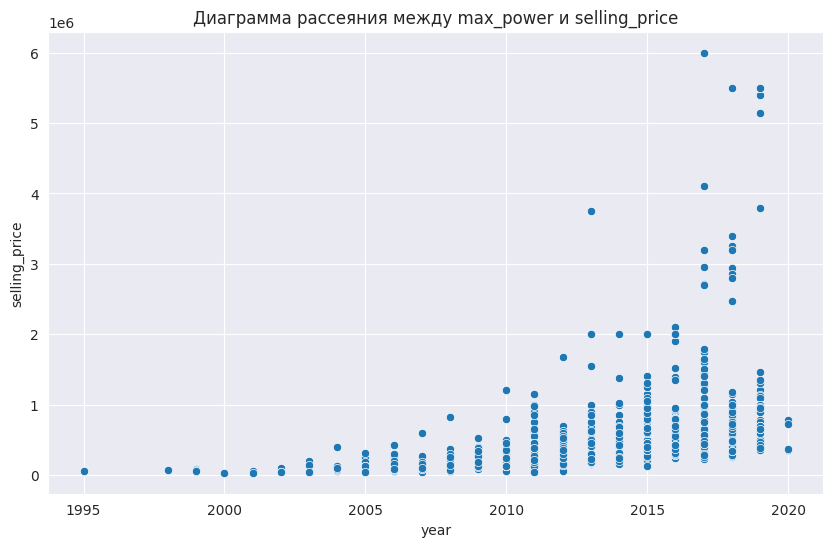

In [38]:
print(
    "построим зависимость целевой переменнной и года выпуска автомобиля и постараемся определить характер зависимости. "
)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="year", y="selling_price", data=df_test)
plt.title(f"Диаграмма рассеяния между {max_power} и {selling_price}")
plt.xlabel("year")
plt.ylabel("selling_price")
plt.show()

Посмотрим на квадратичную трендовую


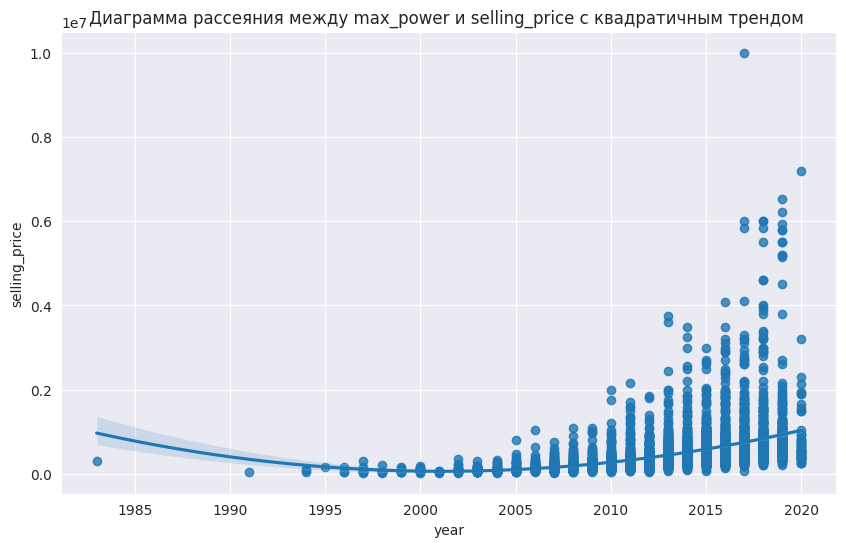

In [39]:
print("Посмотрим на квадратичную трендовую")
plt.figure(figsize=(10, 6))
sns.regplot(x="year", y="selling_price", data=df_train, order=2)
plt.title(
    f"Диаграмма рассеяния между {max_power} и {selling_price} c квадратичным трендом "
)
plt.xlabel("year")
plt.ylabel("selling_price")
plt.show()

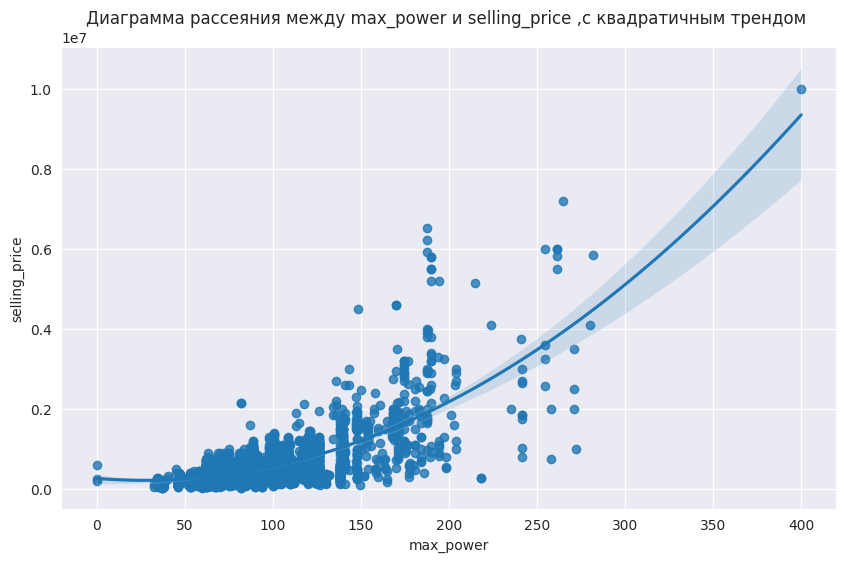

In [40]:
selling_price, max_power = most_correlated_features[0]

plt.figure(figsize=(10, 6))
sns.regplot(x=max_power, y=selling_price, data=df_train, order=2)
plt.title(
    f"Диаграмма рассеяния между {max_power} и {selling_price} ,c квадратичным трендом "
)
plt.xlabel(max_power)
plt.ylabel(selling_price)
plt.show()

In [41]:
print("Обе зависимости  скорее выглядят квадратичными нежели линейными . ")

Обе зависимости  скорее выглядят квадратичными нежели линейными . 


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [89]:
to_delete = [col for col in df_train.columns if df_train[col].dtype == "object"]

y_train = df_train["selling_price"]
X_train = df_train.drop(to_delete, axis=1).drop("selling_price", axis=1)

In [90]:
assert X_train.shape == (5840, 8)

In [91]:
y_test = df_test["selling_price"]
X_test = df_test.drop(to_delete, axis=1).drop("selling_price", axis=1)

In [92]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred) ** 0.5

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred) ** 0.5

print(f"R^2 train: {r2_train:.4f}")
print(f"MSE train: {mse_train:.4f}")
print(f"R^2 test: {r2_test:.4f}")
print(f"MSE test: {mse_test:.4f}")

R^2 train: 0.6004
MSE train: 338450.7870
R^2 test: 0.5994
MSE test: 479843.6129


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_fitted = scaler.fit_transform(X_train)
X_test_fitted = scaler.transform(X_test)

model.fit(X_train_fitted, y_train)

y_train_pred = model.predict(X_train_fitted)
y_test_pred = model.predict(X_test_fitted)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred) ** 0.5

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred) ** 0.5

print(f"R^2 train scaled: {r2_train:.4f}")
print(f"MSE train scaled: {mse_train:.4f}")
print(f"R^2 test scaled: {r2_test:.4f}")
print(f"MSE test scaled: {mse_test:.4f}")

R^2 train scaled: 0.6004
MSE train scaled: 338450.7870
R^2 test scaled: 0.5994
MSE test scaled: 479843.6129


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [95]:
coefficients = pd.Series(model.coef_, index=X_train.columns)
most_informative_feature = coefficients.idxmax()

print("Коэффициенты признаков:")
print(coefficients)

print(f"\nНаиболее информативный признак max_power: {most_informative_feature}")

Коэффициенты признаков:
year              165728.561401
km_driven         -48850.850378
mileage            -5498.151949
engine             26950.012852
max_power         330204.351586
seats             -30132.627309
torque_Nm           2870.201413
max_torque_rpm    -56833.497586
dtype: float64

Наиболее информативный признак max_power: max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [96]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=100)

lasso_model.fit(X_train_fitted, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_fitted)
y_test_pred_lasso = lasso_model.predict(X_test_fitted)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso) ** 0.5

r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso) ** 0.5

print("Lasso:")
print(f"R^2 трейн: {r2_train_lasso:.4f}")
print(f"MSE трейн: {mse_train_lasso:.4f}")
print(f"R^2 тест: {r2_test_lasso:.4f}")
print(f"MSE тест: {mse_test_lasso:.4f}")

Lasso:
R^2 трейн: 0.6004
MSE трейн: 338450.9933
R^2 тест: 0.5993
MSE тест: 479918.7469


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [118]:
scaler.feature_names_in_

array(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque_Nm', 'max_torque_rpm'], dtype=object)

In [97]:
lasso_coefs = lasso_model.coef_

zero_coef_features = X_train.columns[lasso_coefs == 0]

if not zero_coef_features.empty:
    print("Зануленные признаки:")
    print(zero_coef_features)
else:
    print(lasso_coefs)
    print(
        "Зануленных  признаков нет так как штраф добавляемый к функции потерь слишком малл ,Возможно альфа подобрано неверное   "
    )

[165499.84151039 -48757.20187479  -5165.86080801  26739.58231898
 330328.39044957 -29732.14970592   2840.1343532  -56615.04748045]
Зануленных  признаков нет так как штраф добавляемый к функции потерь слишком малл ,Возможно альфа подобрано неверное   


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

 <font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

lasso_model = Lasso()
folds = 10
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 50, 100, 10000, 1000000]}

print(f"Количество фолдов {folds} ")
print(f"Количество обучений {len(param_grid['alpha'] * folds)} ")

lasso_grid = GridSearchCV(lasso_model, param_grid, cv=10, scoring=make_scorer(r2_score))

lasso_grid.fit(X_train_fitted, y_train)

print("Наилучшие параметры:", lasso_grid.best_params_)

y_train_pred_grid = lasso_grid.predict(X_train_fitted)
y_test_pred_grid = lasso_grid.predict(X_test_fitted)

r2_train_grid = r2_score(y_train, y_train_pred_grid)
mse_train_grid = MSE(y_train, y_train_pred_grid) ** 0.5

r2_test_grid = r2_score(y_test, y_test_pred_grid)
mse_test_grid = MSE(y_test, y_test_pred_grid) ** 0.5

print("\nLasso-регрессия с оптимальными параметрами:")
print(f"R^2 трейн: {r2_train_grid:.4f}")
print(f"MSE трейн: {mse_train_grid:.4f}")
print(f"R^2 тест: {r2_test_grid:.4f}")
print(f"MSE тест: {mse_test_grid:.4f}")

Количество фолдов 10 
Количество обучений 90 
Наилучшие параметры: {'alpha': 10000}

Lasso-регрессия с оптимальными параметрами:
R^2 трейн: 0.5975
MSE трейн: 339645.9583
R^2 тест: 0.5860
MSE тест: 487803.5940


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [99]:
best_alpha = lasso_grid.best_params_["alpha"]
lasso_coefs_best = lasso_grid.best_estimator_.coef_

print(f"Лучший коэффициент регуляризации: {best_alpha}")
print("\nКоэффициенты модели с лучшими параметрами:")
best_coef = zip(
    (X_train.columns[lasso_coefs_best != 0]), ([x for x in lasso_coefs_best if x != 0])
)
print(dict(best_coef))

zero_coef_features_best = X_train.columns[lasso_coefs_best == 0]
print("\nЗануленные веса признаков :")
print(zero_coef_features_best)

Лучший коэффициент регуляризации: 10000

Коэффициенты модели с лучшими параметрами:
{'year': 154649.50799974854, 'km_driven': -38707.60926448644, 'max_power': 336639.7992152072, 'max_torque_rpm': -43920.800345427255}

Зануленные веса признаков :
Index(['mileage', 'engine', 'seats', 'torque_Nm'], dtype='object')


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [100]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()

param_grid_elasticnet = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": [0.1, 0.3, 0.5, 0.6],
}

elasticnet_grid = GridSearchCV(elasticnet_model, param_grid_elasticnet, cv=10)

elasticnet_grid.fit(X_train_fitted, y_train)

print("Наилучшие параметры для ElasticNet:", elasticnet_grid.best_params_)

y_train_pred_elasticnet = elasticnet_grid.predict(X_train_fitted)
y_test_pred_elasticnet = elasticnet_grid.predict(X_test_fitted)

r2_train_elasticnet = r2_score(y_train, y_train_pred_elasticnet)
mse_train_elasticnet = MSE(y_train, y_train_pred_elasticnet) ** 0.5

r2_test_elasticnet = r2_score(y_test, y_test_pred_elasticnet)
mse_test_elasticnet = MSE(y_test, y_test_pred_elasticnet) ** 0.5

print("\nElasticNet с оптимальными параметрами:")
print(f"R^2 трейн: {r2_train_elasticnet:.4f}")
print(f"MSE трейн: {mse_train_elasticnet:.4f}")
print(f"R^2 тест: {r2_test_elasticnet:.4f}")
print(f"MSE тест: {mse_test_elasticnet:.4f}")

Наилучшие параметры для ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.1}

ElasticNet с оптимальными параметрами:
R^2 трейн: 0.5959
MSE трейн: 340330.9474
R^2 тест: 0.5785
MSE тест: 492237.7956


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [101]:
print(f"Наилучшие гиперпараметры для ElasticNet:{elasticnet_grid.best_params_}")

Наилучшие гиперпараметры для ElasticNet:{'alpha': 0.1, 'l1_ratio': 0.1}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [102]:
X_train_cat = df_train.drop(["selling_price", "name"], axis=1)
X_test_cat = df_test.drop(["selling_price", "name"], axis=1)

In [103]:
assert X_train_cat.shape == (5840, 12)

In [104]:
X_train_cat.describe(include="object")
X_test_cat.describe(include="object")

,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,534,837,877,623


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [105]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)

df_train_fuel_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_cat[["fuel"]]),
    columns=encoder.get_feature_names_out(["fuel"]),
)
df_test_fuel_encoded = pd.DataFrame(
    encoder.fit_transform(X_test_cat[["fuel"]]),
    columns=encoder.get_feature_names_out(["fuel"]),
)

df_train_seller_type_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_cat[["seller_type"]]),
    columns=encoder.get_feature_names_out(["seller_type"]),
)
df_test_seller_type_encoded = pd.DataFrame(
    encoder.fit_transform(X_test_cat[["seller_type"]]),
    columns=encoder.get_feature_names_out(["seller_type"]),
)

df_train_transmission_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_cat[["transmission"]]),
    columns=encoder.get_feature_names_out(["transmission"]),
)
df_test_transmission_encoded = pd.DataFrame(
    encoder.fit_transform(X_test_cat[["transmission"]]),
    columns=encoder.get_feature_names_out(["transmission"]),
)

df_train_owner_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_cat[["owner"]]),
    columns=encoder.get_feature_names_out(["owner"]),
)
df_test_owner_encoded = pd.DataFrame(
    encoder.fit_transform(X_test_cat[["owner"]]),
    columns=encoder.get_feature_names_out(["owner"]),
)

df_train_encoded = pd.concat(
    [
        X_train_cat,
        df_train_fuel_encoded,
        df_train_seller_type_encoded,
        df_train_transmission_encoded,
        df_train_owner_encoded,
    ],
    axis=1,
)
df_test_encoded = pd.concat(
    [
        X_test_cat,
        df_test_fuel_encoded,
        df_test_seller_type_encoded,
        df_test_transmission_encoded,
        df_test_owner_encoded,
    ],
    axis=1,
)

X_train_cat_encoded = df_train_encoded.drop(
    ["fuel", "seller_type", "transmission", "owner"], axis=1
)
X_test_cat_encoded = df_test_encoded.drop(
    ["fuel", "seller_type", "transmission", "owner"], axis=1
)

X_train_cat_encoded.head()

,year,km_driven,mileage,engine,max_power,seats,torque_Nm,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,5,190.0,2000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,5,250.0,2500.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,5,163.0,2750.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,5,115.0,3000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,5,163.0,4000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [106]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

ridge_model = Ridge()

param_grid_ridge = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

ridge_grid = GridSearchCV(
    ridge_model, param_grid_ridge, cv=10, scoring=make_scorer(r2_score)
)

ridge_grid.fit(X_train_cat_encoded, y_train)

print("Наилучший параметр alpha для Ridge:", ridge_grid.best_params_)

y_train_pred_ridge = ridge_grid.predict(X_train_cat_encoded)
y_test_pred_ridge = ridge_grid.predict(X_test_cat_encoded)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = MSE(y_train, y_train_pred_ridge) ** 0.5

r2_test_ridge = r2_score(y_test, y_test_pred_lasso)
mse_test_ridge = MSE(y_test, y_test_pred_lasso) ** 0.5

print("\nRidge с оптимальными параметрами:")
print(f"R^2 на трейне: {r2_train_ridge:.4f}")
print(f"MSE на трейне: {mse_train_ridge:.4f}")
print(f"R^2 тест: {r2_test_ridge:.4f}")
print(f"MSE тест: {mse_test_ridge:.4f}")
print("Модель обеспечила лучшие показатели на трейне ")

Наилучший параметр alpha для Ridge: {'alpha': 10}

Ridge с оптимальными параметрами:
R^2 на трейне: 0.6443
MSE на трейне: 319295.7315
R^2 тест: 0.5993
MSE тест: 479918.7469
Модель обеспечила лучшие показатели на трейне 


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [68]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [133]:
def business_metrics(y_true, y_pred, tolerance):
    deviation = np.abs(y_true - y_pred) / y_true

    within_tolerance = np.sum(deviation <= tolerance) / len(y_true)

    within_tolerance_percentage = within_tolerance * 100

    return within_tolerance_percentage


print(
    f"Результат печальный и лучше не показывать"
    f" {round(business_metrics(y_test, y_test_pred_lasso, 0.1))}%"

)

Результат печальный и лучше не показывать 24%


In [121]:
import mlflow.sklearn
from app.settings.settings import settings
from mlflow.models import infer_signature

mlflow.set_tracking_uri(settings.mlflow.tracking_uri)
mlflow.set_registry_uri("https://localhost:5000")




In [112]:
"""Так как жто мой первый ноутбук  где я обучаю и сохраняю модели то сохраню как умею в MLFlow """
"""Сохраним модель Lasso в Mlfow """

lasso_experiment = "Lasso_experiment"
mlflow.create_experiment(
    name=lasso_experiment,
    artifact_location=f"s3://mlflow/{lasso_experiment}",
)

experiment = mlflow.set_experiment(lasso_experiment)

with mlflow.start_run():
    mlflow.log_param("alpha", lasso_grid.best_params_)

    mlflow.log_metric("r2_train", r2_train_grid)
    mlflow.log_metric("mse_train", mse_train_grid)
    mlflow.log_metric("r2_test", r2_test_grid)
    mlflow.log_metric("mse_test", mse_test_grid)

    signature = infer_signature(X_test_fitted, y_test_pred_grid)

    mlflow.sklearn.log_model(scaler, "Scaler")

    model_info = mlflow.sklearn.log_model(lasso_grid, "LassoGrid", signature=signature)

2023/11/27 18:52:06 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
/home/kachkin/.cache/pypoetry/virtualenvs/hw1-ml-fastapi-bnrvpx7d-py3.10/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/kachkin/.cache/pypoetry/virtualenvs/hw1-ml-fastapi-bnrvpx7d-py3.10/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [113]:
"""Так же сделаем эксперимент с Ridge в Mlfow """

ridge_experiment = "Ridge_experiment"
mlflow.create_experiment(
    name=ridge_experiment,
    artifact_location=f"s3://mlflow/{ridge_experiment}",
)

mlflow.set_experiment(ridge_experiment)

with mlflow.start_run():
    mlflow.log_param("alpha", ridge_grid.best_params_)

    mlflow.log_metric("r2_train", r2_train_ridge)
    mlflow.log_metric("mse_train", mse_train_ridge)
    mlflow.log_metric("r2_test", r2_test_ridge)
    mlflow.log_metric("mse_test", mse_test_ridge)

    signature = infer_signature(X_test_fitted, y_test_pred_grid)

    model_info = mlflow.sklearn.log_model(lasso_grid, "Ridge", signature=signature)

/home/kachkin/.cache/pypoetry/virtualenvs/hw1-ml-fastapi-bnrvpx7d-py3.10/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/kachkin/.cache/pypoetry/virtualenvs/hw1-ml-fastapi-bnrvpx7d-py3.10/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [54]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link